In [1]:
import numpy as np
import torch
import torch_geometric
import hsnowtrans as hst

In [2]:
# from hsnowtrans.undirected_unweighted import *
# from hsnowtrans.undirected_weighted import *
# from hsnowtrans.directed_unweighted import *
# from hsnowtrans.directed_weighted import *

# 1. Undirected / Unweighted 

`# Ex1` -- 무방향 그래프

In [3]:
links = torch.tensor([[0, 1, 2, 3, 4, 3],
                      [1, 0, 3, 2, 3, 4]], dtype=torch.long)
graph = torch_geometric.data.Data(
    edge_index = links, 
    num_nodes=5
)

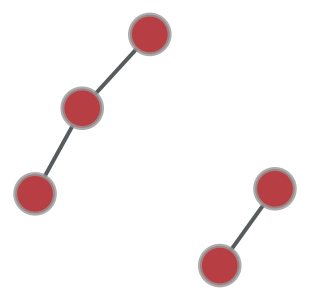

<Graph object, undirected, with 5 vertices and 3 edges, at 0x7f48267773a0>

In [4]:
hst.plot_undirected_unweighted(graph)

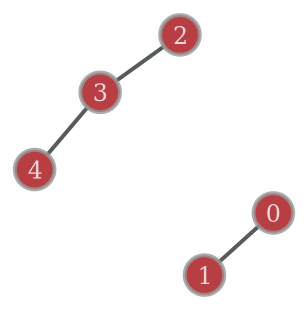

<Graph object, undirected, with 5 vertices and 3 edges, at 0x7f4826815600>

In [5]:
hst.plot_undirected_unweighted(
    graph, 
    node_names = [0,1,2,3,4], 
)

`# Ex2` -- 무방향 그래프, ${\bf y}$는 연속, ${\bf y}$는 color로 표현 

In [6]:
links = torch.tensor([[0, 1, 2, 3, 4, 3],
                      [1, 0, 3, 2, 3, 4]], dtype=torch.long)
graph = torch_geometric.data.Data(
    edge_index = links, 
    num_nodes=5,
    y = np.random.randn(5)
)

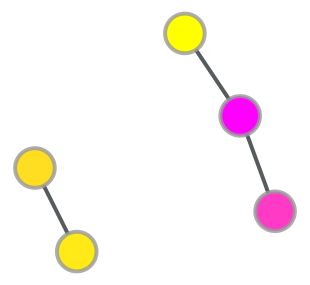

<Graph object, undirected, with 5 vertices and 3 edges, at 0x7f475296c070>

In [7]:
hst.plot_undirected_unweighted(graph,node_color=graph.y)

`# Ex3` -- 무방향 그래프, ${\bf y}$는 범주, ${\bf y}$는 color로 표현 

In [8]:
links = torch.tensor([[0, 1, 2, 3, 4, 3],
                      [1, 0, 3, 2, 3, 4]], dtype=torch.long)
graph = torch_geometric.data.Data(
    edge_index = links, 
    num_nodes=5,
    y = torch.tensor([0,1,0,0,1])
)

/root/share/hsnowtrans/plotkit.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(graph.y) if (hasattr(graph, 'y') and graph.y is not None) else None
/root/share/hsnowtrans/plotkit.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(node_color)


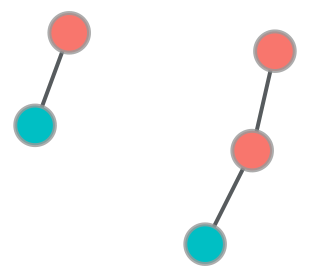

In [9]:
gt_graph = hst.plot_undirected_unweighted(graph,node_color=graph.y)

# 2. Undirected / Weighted 

`# Ex1` -- 무방향 그래프, 가중치 값이 존재

In [10]:
links = torch.tensor([[0, 1, 2, 3, 4, 3],
                      [1, 0, 3, 2, 3, 4]], dtype=torch.long)
weights = torch.tensor([5, 5, 1.5, 1.5, 0.19, 0.19], dtype=torch.float)

graph = torch_geometric.data.Data(
    edge_index=links,
    edge_attr=weights,
    num_nodes =5 
)

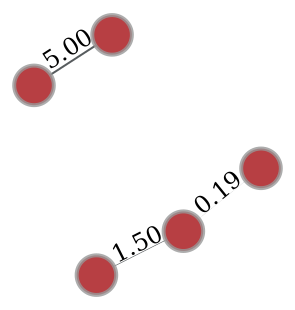

<Graph object, undirected, with 5 vertices and 3 edges, at 0x7f48267c1360>

In [11]:
hst.plot_undirected_weighted(graph,edge_weight_text_format='.2f')

`# Ex2` -- 무방향 그래프, 가중치 값이 존재

In [12]:
links = torch.tensor([[0, 1, 2, 3, 4, 3],
                      [1, 0, 3, 2, 3, 4]], dtype=torch.long)
weights = torch.tensor([5, 5, 1.5, 1.5, 0.19, 0.19], dtype=torch.float)

graph = torch_geometric.data.Data(
    edge_index=links,
    edge_attr=weights,
    num_nodes =5,
    y = torch.tensor([1,1,0,0,0])
)

/root/share/hsnowtrans/plotkit.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(graph.y) if (hasattr(graph, 'y') and graph.y is not None) else None


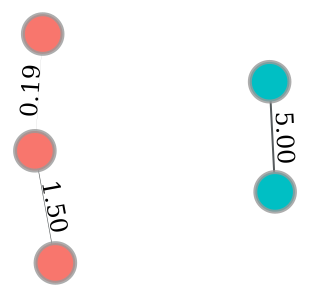

<Graph object, undirected, with 5 vertices and 3 edges, at 0x7f4826817160>

In [13]:
hst.plot_undirected_weighted(graph,node_color=graph.y)

# 3. 

`# Ex2` -- 방향 그래프 

In [10]:
links = torch.tensor([[0, 1, 2, 3, 4, 5],
                      [1, 2, 3, 4, 5, 0]], dtype=torch.long)
graph = torch_geometric.data.Data(edge_index = links, num_nodes=6)

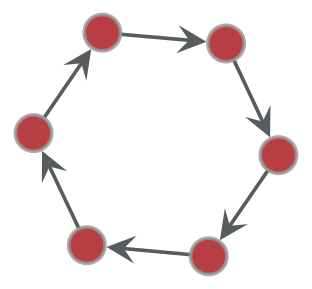

In [11]:
hst.plot_directed_unweighted_without_y(graph)

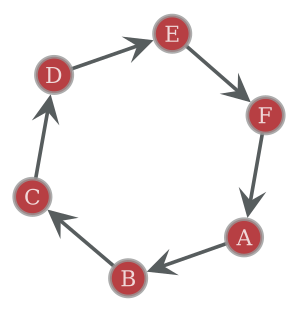

In [12]:
# 사용 예시
hst.plot_directed_unweighted_without_y(
    graph, 
    node_names = ['A', 'B', 'C', 'D', 'E', 'F'], 
)

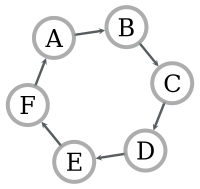

In [13]:
# 사용 예시
ly_opts = {"K": 0.1, "max_iter": 1000}
dr_opts = {
    "vertex_size": 20, 
    "vertex_fill_color": "white", 
    "edge_pen_width": 1.2, 
    "output_size": (100,100)
}
hst.plot_directed_unweighted_without_y(
    graph, 
    node_names = ['A', 'B', 'C', 'D', 'E', 'F'], 
    layout_options = ly_opts,
    draw_options = dr_opts    
)

In [14]:
# 사용 예시
ly_opts = {"K": 0.1, "max_iter": 1000}
dr_opts = {
    "vertex_size": 20, 
    "vertex_fill_color": "white", 
    "edge_pen_width": 1.2, 
    "output_size": (100,100),
    "output": "output.pdf"
}
hst.plot_directed_unweighted_without_y(
    graph, 
    node_names = ['A', 'B', 'C', 'D', 'E', 'F'], 
    layout_options = ly_opts,
    draw_options = dr_opts
)

`# Ex4` -- 방향 그래프, 가중치 값이 존재

In [17]:
links = torch.tensor([[0, 2, 3, 4, 3],
                      [1, 3, 2, 3, 4]], dtype=torch.long)
weights = torch.tensor([5, 1.5, 1.5, 0.19, 0.19], dtype=torch.float)

graph = torch_geometric.data.Data(
    edge_index=links,
    edge_attr=weights,
    num_nodes =5 
)

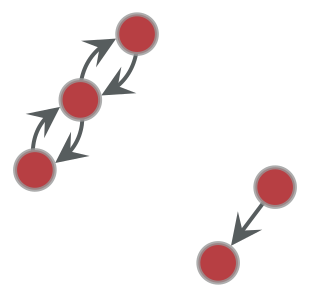

In [18]:
hst.plot_directed_weighted_without_y(graph,edge_weight_text=False,edge_weight_width=False)

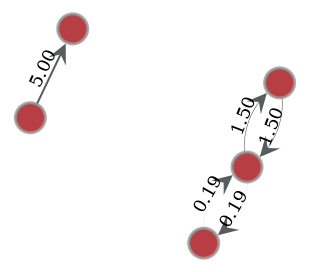

In [19]:
dr_opts = {
    'edge_marker_size': 10, 
    'vertex_size':15
}
hst.plot_directed_weighted_without_y(
    graph,
    draw_options= dr_opts
    )